# Machine Learning Assignment 4

Nakul Thureja | 2020528


# Imports

In [ ]:
!pip install umap-learn
!pip install umap-learn[plot]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82830 sha256=4f270b8ec633f4952b0307e473f7bf1181a954d136a882b9b1d3f5b211be6dc6
  Stored in directory: /root/.cache/pip/wheels/f4/3e/1c/596d0a463d17475af648688443fa4846fef624d1390339e7e9
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55509 sha256=e5a275e7f0cd2c4c0c376aa9f60ee93fb09d608eff25b8fe61cc9a058cc472bb
  Stored in directory: /root/.cache/pip/wheels/b9/89/cc/59ab91ef5b21dc2ab3635528d7d227f49dfc9169905dcb959d
Successfully built umap-learn pynndescent
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/pu

In [ ]:
#Importing Libraries for the assignment
import matplotlib.pyplot as plt
import math
import random
import requests
import pandas as pd
import numpy as np
import pickle
import io
import seaborn as sn
from sklearn import datasets
from keras.datasets import fashion_mnist
from sklearn.metrics import mean_squared_error,accuracy_score,classification_report, confusion_matrix, log_loss
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from google.colab import drive
import gzip
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
import os
import keras
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Flatten, Dense, Input, GlobalAveragePooling2D
from keras.models import Model, Sequential, load_model
from keras.callbacks import TensorBoard
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn import svm
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn import preprocessing
from keras.datasets import fashion_mnist
from keras.utils import img_to_array, array_to_img
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
import umap.plot as plotter
import umap.umap_ as umap

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def pickle_data(file,model):
  pickle.dump(model, open(file, 'wb'))


In [ ]:
def unpickle_data(file):
    with open(file, 'rb') as f:
        data = pickle.load(f, encoding='latin1')
    return data

# Question 1

In [366]:
X_train = pd.read_csv("/content/drive/My Drive/UCI HAR Dataset/X_train.txt", sep='\s+', index_col=False,header=None)
y_train = pd.read_csv("/content/drive/My Drive/UCI HAR Dataset/y_train.txt", header=None)
X_test = pd.read_csv("/content/drive/My Drive/UCI HAR Dataset/X_test.txt", sep='\s+', index_col=False,header=None)
y_test = pd.read_csv("/content/drive/My Drive/UCI HAR Dataset/y_test.txt", header=None)

In [367]:
X_train.shape,X_test.shape,

((7352, 561), (2947, 561))

In [368]:
y_train.shape,y_test.shape,

((7352, 1), (2947, 1))

In [369]:
X = pd.concat([X_train,X_test])
y = np.concatenate([y_train,y_test])

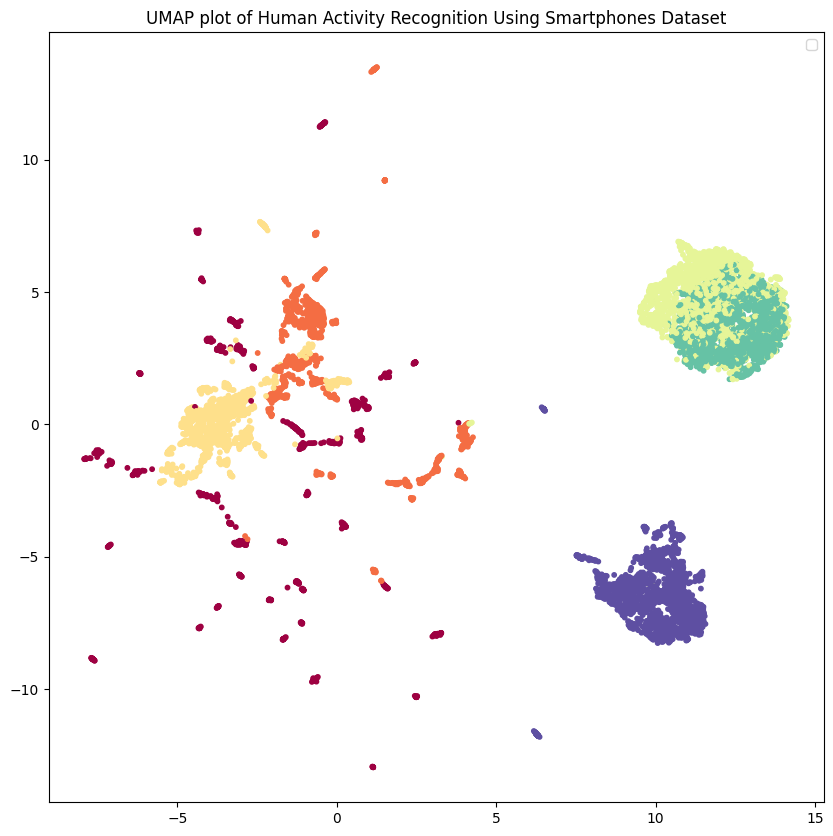

In [371]:
# Apply UMAP
reducer = umap.UMAP() # Create a UMAP instance
X_reduced = reducer.fit_transform(X) # Fit and transform the features

# Plot the reduced features
plt.figure(figsize=(10, 10)) # Create a figure
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="Spectral", s=10) # Plot the points with colors according to labels
plt.title("UMAP plot of Human Activity Recognition Using Smartphones Dataset")
plt.legend(loc="best") 
plt.show() 

In [ ]:
from sklearn.cluster import KMeans, SpectralClustering
from scipy.spatial.distance import cdist

In [ ]:
# Define the number of clusters to test from 2 to 10
ks = range(2, 11)

# Create an empty list to store the sum of squared distances for each k
kmeans_ssds = []
spectral_ssds = []
# Loop over the number of clusters
for k in ks:
    # Create new instances of K-Means and spectral clustering with k clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    spectral = SpectralClustering(n_clusters=k,affinity = 'nearest_neighbors',random_state=0)

    # Fit the model to the UMAP reduced features
    kmeans_labels = kmeans.fit(X_reduced)
    spectral_labels = spectral.fit_predict(X_reduced)

    # Compute the sum of squared distances between each point and its assigned cluster centroid
    kmeans_ssd = sum(np.min(cdist(X_reduced, kmeans.cluster_centers_, "euclidean"), axis=1))
    
    # Compute the cluster centroids as the mean of the points in each cluster
    cluster_centers = np.array([X_reduced[spectral_labels == i].mean(axis=0) for i in range(k)])
    # Compute the sum of squared distances between each point and its assigned cluster centroid
    spectral_ssd = sum(np.min(cdist(X_reduced, cluster_centers, "euclidean"), axis=1))

    # Append the ssd to the list
    kmeans_ssds.append(kmeans_ssd)
    spectral_ssds.append(spectral_ssd)

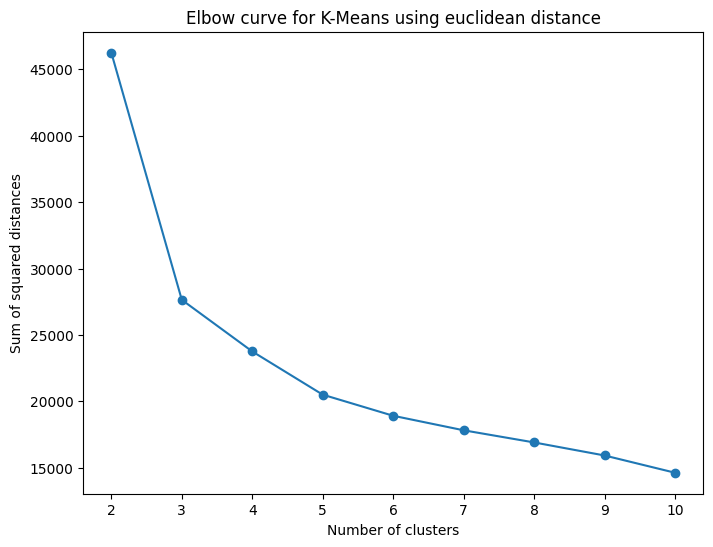

In [ ]:
# Plot the elbow curve using the ssds
plt.figure(figsize=(8, 6)) # Create a figure
plt.plot(ks, kmeans_ssds, marker="o") # Plot the ssds for each k
plt.xlabel("Number of clusters") # Add an x-axis label
plt.ylabel("Sum of squared distances") # Add a y-axis label
plt.title("Elbow curve for K-Means using euclidean distance") # Add a title
plt.show() # Show the plot

Elbow at n_clusters = 6

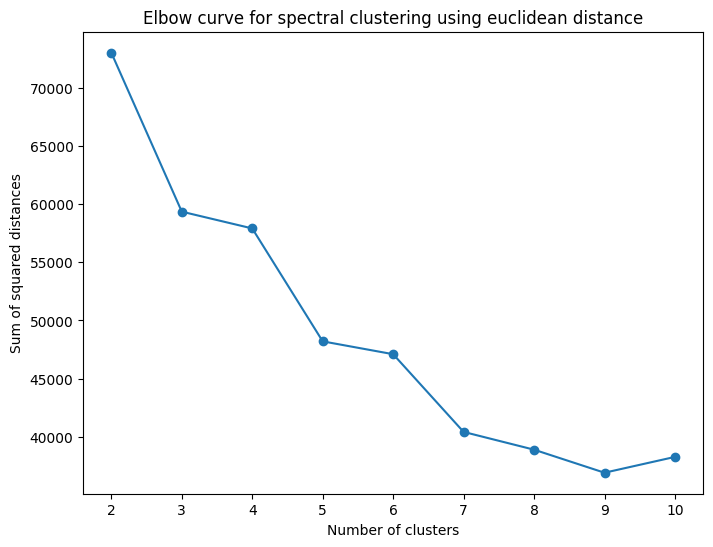

In [ ]:
# Plot the elbow curve using the ssds
plt.figure(figsize=(8, 6)) # Create a figure
plt.plot(ks, spectral_ssds, marker="o") # Plot the ssds for each k
plt.xlabel("Number of clusters") # Add an x-axis label
plt.ylabel("Sum of squared distances") # Add a y-axis label
plt.title("Elbow curve for spectral clustering using euclidean distance") # Add a title
plt.show() # Show the plot

Elbow at n_clusters = 7

In [ ]:
from sklearn.metrics import silhouette_score,adjusted_rand_score,calinski_harabasz_score,normalized_mutual_info_score,davies_bouldin_score

In [ ]:
y_test = np.array(y_test)
y_test = y_test.reshape((y_test.shape[0],))
X_reduced_test = reducer.fit_transform(X_test) # Fit and transform the features

In [ ]:
# evaluation metrics for k-means
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(X_reduced)
y_pred = kmeans.predict(X_reduced_test)
print("Silhouette Score: ",silhouette_score(X_reduced_test, y_pred))
print("Adjusted Rand Score Individual: ",adjusted_rand_score(y_test, y_pred))
print("Calinski Harabasz Score Individual: ",calinski_harabasz_score(X_reduced_test, y_pred))
print("Normalized Mutual Info Score Individual: ", normalized_mutual_info_score(y_test, y_pred))
print("Davies Bouldin Score Individual: ",davies_bouldin_score(X_reduced_test, y_pred))

Silhouette Score:  0.59733653
Adjusted Rand Score Individual:  0.4747215848070441
Calinski Harabasz Score Individual:  6678.361163474
Normalized Mutual Info Score Individual:  0.6392762823369204
Davies Bouldin Score Individual:  0.6283640826643564


In [364]:
pickle_data("Q1_kmeans.pkl",kmeans)

In [ ]:
# evaluation metrics for spectral clustering
spectral = SpectralClustering(n_clusters=7,affinity = 'nearest_neighbors',random_state=0)
spectral.fit(X_reduced)
y_pred = spectral.fit_predict(X_reduced_test)
print("Silhouette Score: ",silhouette_score(X_reduced_test, y_pred))
print("Adjusted Rand Score Individual: ",adjusted_rand_score(y_test, y_pred))
print("Calinski Harabasz Score Individual: ",calinski_harabasz_score(X_reduced_test, y_pred))
print("Normalized Mutual Info Score Individual: ", normalized_mutual_info_score(y_test, y_pred))
print("Davies Bouldin Score Individual: ",davies_bouldin_score(X_reduced_test, y_pred))

Silhouette Score:  0.109264806
Adjusted Rand Score Individual:  0.3433518936440284
Calinski Harabasz Score Individual:  460.8813005615595
Normalized Mutual Info Score Individual:  0.45900544951386774
Davies Bouldin Score Individual:  1.234337228437936


In [365]:
pickle_data("Q1_spectral.pkl",spectral)

Thus better grouping is indicated by higher Silhouette, Calinski Harabasz, and lower Davies Bouldin, ARI, and NMI scores.
Kmeans performs better than Spectral Clustering according to Silhouette, Calinski Harabasz, and Davies Bouldin.
Spectral Clustering performs better than Kmeans according to ARI, and NMI scores.

# Question 2

In [341]:
# reading the data
import sklearn
X,y = sklearn.datasets.load_wine(return_X_y= True)

In [342]:
X = pd.DataFrame(X)

In [343]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [344]:
#Scaling the columns between 0.0 to 1.0
from pandas.api.types import is_numeric_dtype
#looping over columns
for i in X.columns:
  #to check if dtype is numeric and can be scaled by diving from max value
  if(is_numeric_dtype(X[i])):
    #finding max of each column
    max = X[i].max()
    print("Max value in column ",i," is ",max)
    #diving it by max
    X[i] = X[i]/max  

Max value in column  0  is  14.83
Max value in column  1  is  5.8
Max value in column  2  is  3.23
Max value in column  3  is  30.0
Max value in column  4  is  162.0
Max value in column  5  is  3.88
Max value in column  6  is  5.08
Max value in column  7  is  0.66
Max value in column  8  is  3.58
Max value in column  9  is  13.0
Max value in column  10  is  1.71
Max value in column  11  is  4.0
Max value in column  12  is  1680.0


In [345]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.876643,0.402819,0.732668,0.649831,0.615689,0.591524,0.399463,0.548264,0.444385,0.389084,0.559912,0.652921,0.444579
std,0.054742,0.192611,0.084936,0.111319,0.088163,0.161302,0.196626,0.188566,0.159877,0.178330,0.133668,0.177498,0.187445
min,0.743763,0.127586,0.421053,0.353333,0.432099,0.252577,0.066929,0.196970,0.114525,0.098462,0.280702,0.317500,0.165476
25%,0.833614,0.276293,0.684211,0.573333,0.543210,0.449098,0.237205,0.409091,0.349162,0.247692,0.457602,0.484375,0.297917
50%,0.879973,0.321552,0.730650,0.650000,0.604938,0.606959,0.420276,0.515152,0.434358,0.360769,0.564327,0.695000,0.400893
75%,0.922286,0.531466,0.791796,0.716667,0.660494,0.721649,0.565945,0.662879,0.544693,0.476923,0.654971,0.792500,0.586310
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [346]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       178 non-null    float64
 1   1       178 non-null    float64
 2   2       178 non-null    float64
 3   3       178 non-null    float64
 4   4       178 non-null    float64
 5   5       178 non-null    float64
 6   6       178 non-null    float64
 7   7       178 non-null    float64
 8   8       178 non-null    float64
 9   9       178 non-null    float64
 10  10      178 non-null    float64
 11  11      178 non-null    float64
 12  12      178 non-null    float64
dtypes: float64(13)
memory usage: 18.2 KB


In [347]:
X.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [348]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [349]:
#Finding the number and type of classes
#to find the classes I have looped over the y data(dependent variable) to find unique values and store them in a List
classes = []
for i in y:
  if i not in classes:
    classes.append(i)
classes.sort()
#Print the classes and no. of classes
print(classes)
print(len(classes))

[0, 1, 2]
3


Class Distribution

{0: 59, 1: 71, 2: 48}


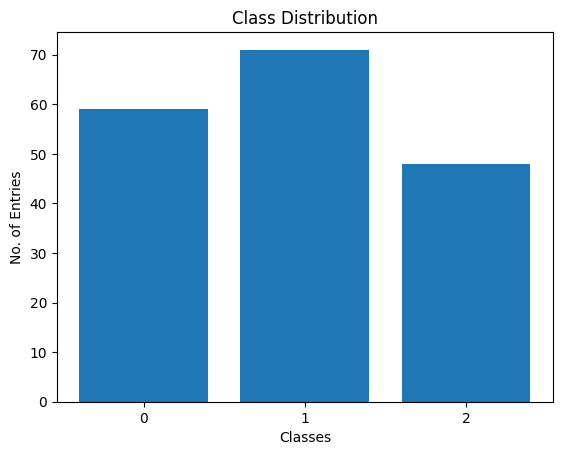

In [350]:
#Printing Class Distribution
#I have maintained a dict with keys as the classes found in previous subparts
#Now i loop over y dataset to update dict according to the class.  
m = {}
for i in classes:
  m[i] = 0
for i in y:
  m[i] += 1

#Printing the dictionary with class frequency 
print("Class Distribution\n")
print(m)

#Plotting a bar graph between frequency and class using dict created 
plt.bar(list(m.keys()),list(m.values()))
plt.xticks(range(3))
plt.xlabel("Classes")
plt.ylabel("No. of Entries")
plt.title("Class Distribution")
plt.show()

In [351]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

### Random forest

In [352]:
# Build a Random Forest classifier with 100 trees
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=15)
clf.fit(X_train, y_train) # train the model

RandomForestClassifier(random_state=15)

In [353]:
y_pred = clf.predict(X_test)

In [354]:
pickle_data("Q2_randomforest.pkl",clf)

In [355]:
# Evaluate the model performance
print("For Random Forest:")
print("Accuracy Score: ", accuracy_score(y_test, y_pred)) # accuracy score
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred)) # confusion matrix
print("Classification Report: ",classification_report(y_test, y_pred)) # classification report
from sklearn.metrics import f1_score
print("Macro f1 score: ",f1_score(y_test, y_pred, average='macro'))
print("Micro f1 score: ",f1_score(y_test, y_pred, average='micro'))
print("Weighted f1 score: ",f1_score(y_test, y_pred, average='weighted'))

For Random Forest:
Accuracy Score:  1.0
Confusion Matrix:  [[18  0  0]
 [ 0 19  0]
 [ 0  0 17]]
Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        17

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

Macro f1 score:  1.0
Micro f1 score:  1.0
Weighted f1 score:  1.0


Random Forest: This method employs a group of decision trees that have been trained using various feature subsets and bootstrap sampling samples. By averaging the predictions of several trees, it lowers the variance and overfitting of a single decision tree. It has strong interpretability and can manage multidimensional and complicated data.

### Decision Tree with Bootstrap Aggregation


In [356]:
# Build a Bagging classifier with 100 Decision Trees
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=15)
clf.fit(X_train, y_train) # train the model

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=15)

In [357]:
y_pred = clf.predict(X_test)

In [358]:
pickle_data("Q2_bootstrap.pkl",clf)

In [359]:
# Evaluate the model performance
print("For Decision Tree with Bootstrap Aggregation:")
print("Accuracy Score: ", accuracy_score(y_test, y_pred)) # accuracy score
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred)) # confusion matrix
print("Classification Report: ",classification_report(y_test, y_pred)) # classification report
from sklearn.metrics import f1_score
print("Macro f1 score: ",f1_score(y_test, y_pred, average='macro'))
print("Micro f1 score: ",f1_score(y_test, y_pred, average='micro'))
print("Weighted f1 score: ",f1_score(y_test, y_pred, average='weighted'))

For Decision Tree with Bootstrap Aggregation:
Accuracy Score:  1.0
Confusion Matrix:  [[18  0  0]
 [ 0 19  0]
 [ 0  0 17]]
Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        17

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

Macro f1 score:  1.0
Micro f1 score:  1.0
Weighted f1 score:  1.0


Bagging: This method employs a group of decision trees that have been trained using various subsets of data obtained by bootstrap sampling. By averaging the predictions of several trees, it lowers the variance and overfitting of a single decision tree. Although it can handle complicated and high-dimensional data effectively, Random Forest is more interpretable.

### Decision Tree with AdaBoost

In [360]:
# Build an AdaBoost classifier with 100 Decision Trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=15)
clf.fit(X_train, y_train) # train the model

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                   random_state=15)

In [361]:
y_pred = clf.predict(X_test)

In [362]:
pickle_data("Q2_adaboost.pkl",clf)

In [363]:
# Evaluate the model performance
print("For Decision Tree with AdaBoost:")
print("Accuracy Score: ", accuracy_score(y_test, y_pred)) # accuracy score
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred)) # confusion matrix
print("Classification Report: ",classification_report(y_test, y_pred)) # classification report
from sklearn.metrics import f1_score
print("Macro f1 score: ",f1_score(y_test, y_pred, average='macro'))
print("Micro f1 score: ",f1_score(y_test, y_pred, average='micro'))
print("Weighted f1 score: ",f1_score(y_test, y_pred, average='weighted'))

For Decision Tree with AdaBoost:
Accuracy Score:  0.9259259259259259
Confusion Matrix:  [[18  0  0]
 [ 0 17  2]
 [ 0  2 15]]
Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.89      0.89      0.89        19
           2       0.88      0.88      0.88        17

    accuracy                           0.93        54
   macro avg       0.93      0.93      0.93        54
weighted avg       0.93      0.93      0.93        54

Macro f1 score:  0.9256965944272446
Micro f1 score:  0.9259259259259259
Weighted f1 score:  0.9259259259259259


AdaBoost: This method employs a group of decision trees that are consecutively trained using weighted data. At each iteration, the weight of incorrectly classified samples rises while the weight of correctly identified samples falls. By enhancing the predictions of several trees, it lessens the bias and underfitting of a single decision tree. Although it does well with low-dimensional and straightforward data, noise and outliers are sensitive to it.

Random Forest and Decision Tree with Bootstrap Aggregation performs similarly and better than Decision tree with ADABoost compared on the basis accuracy score and macro, micro and weighted f1 scores.

# Question 3

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/My Drive/cardekho.csv')
print(df.head())

                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  


In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
print(df.info()) # check for missing values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB
None


In [ ]:
print(df.describe()) # check for summary statistics and outliers

              year  selling_price      km_driven
count  4340.000000   4.340000e+03    4340.000000
mean   2013.090783   5.041273e+05   66215.777419
std       4.215344   5.785487e+05   46644.102194
min    1992.000000   2.000000e+04       1.000000
25%    2011.000000   2.087498e+05   35000.000000
50%    2014.000000   3.500000e+05   60000.000000
75%    2016.000000   6.000000e+05   90000.000000
max    2020.000000   8.900000e+06  806599.000000


In [ ]:
print(df.nunique()) # check for number of unique values in each column

name             1491
year               27
selling_price     445
km_driven         770
fuel                5
seller_type         3
transmission        2
owner               5
dtype: int64


In [ ]:
# Encode categorical variables
le = LabelEncoder()
df['fuel'] = le.fit_transform(df['fuel'])
df['owner'] = le.fit_transform(df['owner'])
df['seller_type'] = le.fit_transform(df['seller_type'])
df['transmission'] = le.fit_transform(df['transmission'])
df.drop("name", axis=1, inplace = True)

In [ ]:
# Scale numerical variables
scaler = StandardScaler()
df[['year', 'selling_price', 'km_driven']] = scaler.fit_transform(df[['year', 'selling_price', 'km_driven']])

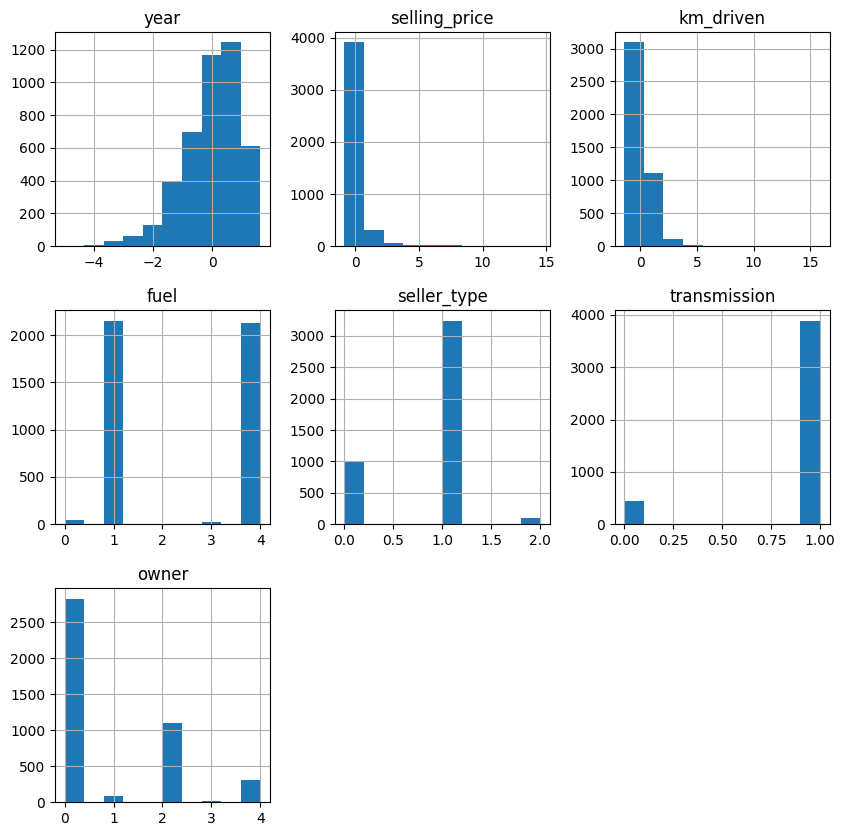

In [ ]:
# Plot histograms of numerical variables
df.hist(figsize=(10, 10))
plt.show()

In [ ]:
# Split the data into train and test sets
X = df.drop('selling_price', axis=1) # features
y = df['selling_price'] # target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # 80% train and 20% test

In [ ]:
X

,year,km_driven,fuel,seller_type,transmission,owner
0,-1.445074,0.081139,4,1,1,0
1,-1.445074,-0.347689,4,1,1,0
2,-0.258795,0.724381,1,1,1,0
3,0.927485,-0.433455,4,1,1,0
4,0.215717,1.603479,1,1,1,2
...,...,...,...,...,...,...
4335,0.215717,0.295553,1,1,1,2
4336,0.215717,0.295553,1,1,1,2
4337,-0.970563,0.359877,4,1,1,2
4338,0.690229,0.509967,1,1,1,0


In [ ]:
X_train.shape, y_train.shape

((3472, 6), (3472,))

In [ ]:
X_test.shape, y_test.shape

((868, 6), (868,))

In [ ]:
# Define and implement the models from scratch
# Lasso regression
class LassoRegression:

    def __init__(self, alpha=0.01, max_iter=1000):
        self.alpha = alpha 
        self.max_iter = max_iter 
        self.coef_ = None 

    def fit(self, X_train, y_train):
        n_samples, n_features = X_train.shape 
        self.coef_ = np.zeros(n_features) 
        for _ in range(self.max_iter): 
            y_pred = np.dot(X_train, self.coef_) 
            error = y_train - y_pred 
            # calculate gradient with L1 regularization term
            grad = -(2/n_samples) * np.dot(X_train.T, error) + self.alpha * np.sign(self.coef_) 
            self.coef_ -= grad * self.alpha 

    def predict(self, X_test):
        return np.dot(X_test, self.coef_) 


In [ ]:
# Create a Lasso regression model with alpha=0.01 and max_iter=1000
lasso = LassoRegression(alpha=0.01, max_iter=10000)

# Fit the model on the train set
lasso.fit(X_train, y_train)

# Predict on the test set
y_pred_lasso = lasso.predict(X_test)

# Evaluate the model performance on the test set
mse_lasso, r2_lasso = mean_squared_error(y_test,y_pred_lasso),r2_score(y_test,y_pred_lasso)
print('Lasso Regression: MSE = ',mse_lasso ,' R2 = ',r2_lasso)

Lasso Regression: MSE =  0.8533646284364341  R2 =  0.23099418868215638


In [ ]:
# Define and implement the models from scratch
# Lasso regression
class RidgeRegression:

    def __init__(self, alpha=0.01, max_iter=1000):
        self.alpha = alpha
        self.max_iter = max_iter
        self.coef_ = None 

    def fit(self, X_train, y_train):
        n_samples, n_features = X_train.shape 
        self.coef_ = np.zeros(n_features) 
        for _ in range(self.max_iter): 
            y_pred = np.dot(X_train, self.coef_) 
            error = y_train - y_pred 
            # calculate gradient with L2 regularization term
            grad = -(2/n_samples) * np.dot(X_train.T, error) + (self.alpha/2) * np.sign(self.coef_) * np.sign(self.coef_) 
            self.coef_ -= grad * self.alpha 

    def predict(self, X_test):
        return np.dot(X_test, self.coef_) 

In [ ]:
# Split the data into train and test sets
X = df.drop('selling_price', axis=1) # features
y = df['selling_price'] # target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # 80% train and 20% test

In [ ]:
# Create a Lasso regression model with alpha=0.01 and max_iter=1000
ridge = RidgeRegression(alpha=0.01, max_iter=10000)

# Fit the model on the train set
ridge.fit(X_train, y_train)

# Predict on the test set
y_pred_ridge = ridge.predict(X_test)

# Evaluate the model performance on the test set
mse_ridge, r2_ridge = mean_squared_error(y_test,y_pred_lasso),r2_score(y_test,y_pred_lasso)
print('Ridge Regression: MSE = ',mse_ridge ,' R2 = ',r2_ridge)

Ridge Regression: MSE =  0.8533646284364341  R2 =  0.23099418868215638


In [ ]:
# Define and implement the Locally weighted linear regression model from scratch
class LocallyWeightedLinearRegression:

    def __init__(self, tau=0.5):
        # kernel parameter
        self.tau = tau 

    def fit(self, X_train, y_train):
        # store the training data
        self.X_train = X_train 
        self.y_train = y_train 

    def predict(self, X_test):
        x = np.c_[np.ones(len(self.X_train)), self.X_train]
        y_pred = [] # initialize an empty list for predictions
        for i in range(len(X_test)):
            x0 = X.iloc[i]
            x0 = np.r_[1, x0]
            w = np.diag(np.exp(-np.sum((x - x0)**2, axis=1) / (2 * self.tau**2)))
            # Solve the normal equation to get theta
            theta = np.linalg.pinv(x.T @ w @ x) @ x.T @ w @ self.y_train
            # Return the predicted output for x0
            y_pred.append(x0 @ theta) 
        return np.array(y_pred) 

In [ ]:
# Split the data into train and test sets
X = df.drop('selling_price', axis=1) # features
y = df['selling_price'] # target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # 80% train and 20% test

In [ ]:
# Create a Locally Weighted Linear Regression model with tau = 0.1
local = LocallyWeightedLinearRegression(0.5)

# Fit the model on the train set
local.fit(X_train, y_train)

# Predict on the test set
y_pred_local = local.predict(X_test)

# Evaluate the model performance on the test set
mse_local, r2_local = mean_squared_error(y_test, y_pred_local), r2_score(y_test, y_pred_local)
print('Locally Weighted Linear Regression: MSE = ',mse_local,' R2 = ',r2_local)

Locally Weighted Linear Regression: MSE =  2.062116683168691  R2 =  -0.8582674511336652


In [376]:
class Node:
    def __init__(self, depth=0, max_depth=10, min_samples_split=2):
        self.depth = depth
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.split_feature = None
        self.split_threshold = None
        self.left = None
        self.right = None
        self.value = None

    # creates best split according to data based on MSE loss
    def split(self, X, y):
        n_samples, n_features = X.shape
        
        # check if the node is a leaf or has reached the maximum depth
        if n_samples < 2 * self.min_samples_split or self.depth >= self.max_depth:
            self.value = np.mean(y) # assign the mean value as the prediction
            return
        
        best_mse = np.inf # initialize the best mse as infinity
        
        # loop over all features and possible thresholds
        for i in range(n_features):
            for threshold in np.unique(X.iloc[:, i]):
                # split the data into left and right subsets based on the threshold
                left_indices = X.iloc[:, i] < threshold
                right_indices = X.iloc[:, i] >= threshold
                left_y, right_y = y[left_indices], y[right_indices]
                
                # skip if either subset is empty
                if len(left_y) == 0 or len(right_y) == 0:
                    continue
                
                # calculate the weighted mse of the split
                mse = (np.var(left_y) * len(left_y) + np.var(right_y) * len(right_y)) / n_samples
                
                # update the best feature, threshold and mse if the current mse is lower
                if mse < best_mse:
                    best_feature, best_threshold, best_mse = i, threshold, mse
        
        # check if no valid split was found
        if best_mse == np.inf:
            self.value = np.mean(y) # assign the mean value as the prediction
            return
        
        # assign the best feature and threshold to the node attributes
        self.split_feature = best_feature
        self.split_threshold = best_threshold
        
        # create the left and right child nodes with increased depth
        left_indices = X.iloc[:, best_feature] < best_threshold
        right_indices = X.iloc[:, best_feature] >= best_threshold
        
        self.left = Node(self.depth + 1, self.max_depth, self.min_samples_split)
        self.right = Node(self.depth + 1, self.max_depth, self.min_samples_split)
        
        # recursively split the child nodes with the corresponding data subsets
        self.left.split(X[left_indices], y[left_indices])
        self.right.split(X[right_indices], y[right_indices])

    def predict(self, x):
        # check if the node is a leaf
        if self.value is not None:
            return self.value
        # check which child node to traverse based on the feature value
        if x[self.split_feature] < self.split_threshold:
            return self.left.predict(x)
        else:
            return self.right.predict(x)

class RegressionDecisionTree():
    def __init__(self, max_depth=5, min_samples_split=2):
        # initialize the tree attributes
        self.max_depth = max_depth # maximum depth allowed for the tree
        self.min_samples_split = min_samples_split # minimum number of samples required to split a node
        self.root = None # root node of the tree
    
    def fit(self, X, y):
        # create the root node with the given parameters
        self.root = Node(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
        # split the root node using the training data
        self.root.split(X, y)
    
    def predict(self, X_test):
        # loop over all test samples and predict using the root node
        y_pred = np.array([self.root.predict(X_test.iloc[i]) for i in range(len(X_test))])
        return y_pred # return the predicted values as a numpy array


In [ ]:
# Split the data into train and test sets
X = df.drop('selling_price', axis=1) # features
y = df['selling_price'] # target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # 80% train and 20% test

In [ ]:
# Create an instance of the DecisionTreeRegressor class with custom parameters
tree = RegressionDecisionTree(max_depth=10, min_samples_split=10)

# Fit the model on the training data
tree.fit(X_train, y_train)

# Predict the output for the testing data
y_pred_tree = tree.predict(X_test)

# Evaluate the performance of the model using mean squared error and r-squared score
mse_tree,r2_tree = mean_squared_error(y_test, y_pred_tree),r2_score(y_test, y_pred_tree)
print('Decision Tree Regressor: MSE = ',mse_tree,' R2 = ',r2_tree)

Decision Tree Regressor: MSE =  0.6776235238673349  R2 =  0.3893625182304217


In [ ]:
#Creating a class CustomKNearestNeighbour to implement our custom KNN
class KNearestNeighbour:
  def __init__(self,k):
    self.k = k

  # fitting the model on given dataset
  def fit(self,X_train,y_train):
    self.X_train = X_train
    self.y_train = y_train
  
  #given a point find its dist from all the points in X_train and returns a sorted list
  def calculate_dist(self,point):
    dist_dict = {}
    #looping and finding euc dist
    for i in range(len(self.X_train)):
      euc_dist = np.sum((X_train.iloc[i] - point)**2) 
      dist_dict[i] = euc_dist
    #sorted dict of distances
    sorted_dict = sorted(dist_dict.items(), key=lambda x:x[1])
    return sorted_dict

  #can predict for one row
  def predict_one(self,point):
    sorted_dict = self.calculate_dist(point)
    total = 0
    # get first k nearest neighbours
    for i in range(self.k):
      total += self.y_train.iloc[sorted_dict[i][0]]
    #returns average of the neighbours
    return total/self.k

  
  def predict(self,X_test):
    #Predict the by looping over X_test and getting predictions one at a time from predict_one function
    rows = X_test.shape[0]
    y_pred = np.zeros(rows,)
    for i in range(rows):
      y_pred[i] = self.predict_one(X_test.iloc[i])
    return y_pred

In [ ]:
# Split the data into train and test sets
X = df.drop('selling_price', axis=1) # features
y = df['selling_price'] # target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # 80% train and 20% test

In [ ]:
knn = KNearestNeighbour(10)
# fitting the model
knn.fit(X_train,y_train)

# predicting from the model
y_pred_knn = knn.predict(X_test)

# Evaluate the performance of the model using mean squared error and r-squared score
mse_knn,r2_knn = mean_squared_error(y_test, y_pred_knn),r2_score(y_test, y_pred_knn)
print('K Nearest Neighbor Regressor: MSE = ',mse_knn,' R2 = ',r2_knn)

K Nearest Neighbor Regressor: MSE =  0.339715759089652  R2 =  0.6938666260226245


In [ ]:
# Average Ensemble TEchnique Used
y_pred_total = (y_pred_lasso + y_pred_ridge + y_pred_local + y_pred_tree + y_pred_knn)/5
mse_total,r2_total = mean_squared_error(y_test, y_pred_total),r2_score(y_test, y_pred_total)
print('Ensemble Regressor: MSE = ',mse_total,' R2 = ',r2_total)

Ensemble Regressor: MSE =  0.5505757750865087  R2 =  0.5038510426801814


In [336]:
pickle_data("Q3_lasso.pkl",lasso)
pickle_data("Q3_ridge.pkl",ridge)
pickle_data("Q3_local.pkl",local)
pickle_data("Q3_tree.pkl",tree)
pickle_data("Q3_knn.pkl",knn)

# Question 4

In [ ]:
df = pd.read_csv('/content/drive/My Drive/bank/bank-full.csv',sep=";")

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
print(df.info()) # check for missing values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


In [ ]:
print(df.describe()) # check for summary statistics and outliers

                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

In [ ]:
print(df.nunique()) # check for number of unique values in each column

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64


In [ ]:
# Encode categorical variables
le = LabelEncoder()
df['job'] = le.fit_transform(df['job'])
df['marital'] = le.fit_transform(df['marital'])
df['education'] = le.fit_transform(df['education'])
df['default'] = le.fit_transform(df['default'])
df['housing'] = le.fit_transform(df['housing'])
df['loan'] = le.fit_transform(df['loan'])
df['month'] = le.fit_transform(df['month'])
df['poutcome'] = le.fit_transform(df['poutcome'])
df['contact'] = le.fit_transform(df['contact'])
df['y'] = le.fit_transform(df['y'])

In [ ]:
# Scale numerical variables
scaler = StandardScaler()
df[['age', 'balance', 'duration']] = scaler.fit_transform(df[['age', 'balance', 'duration']])

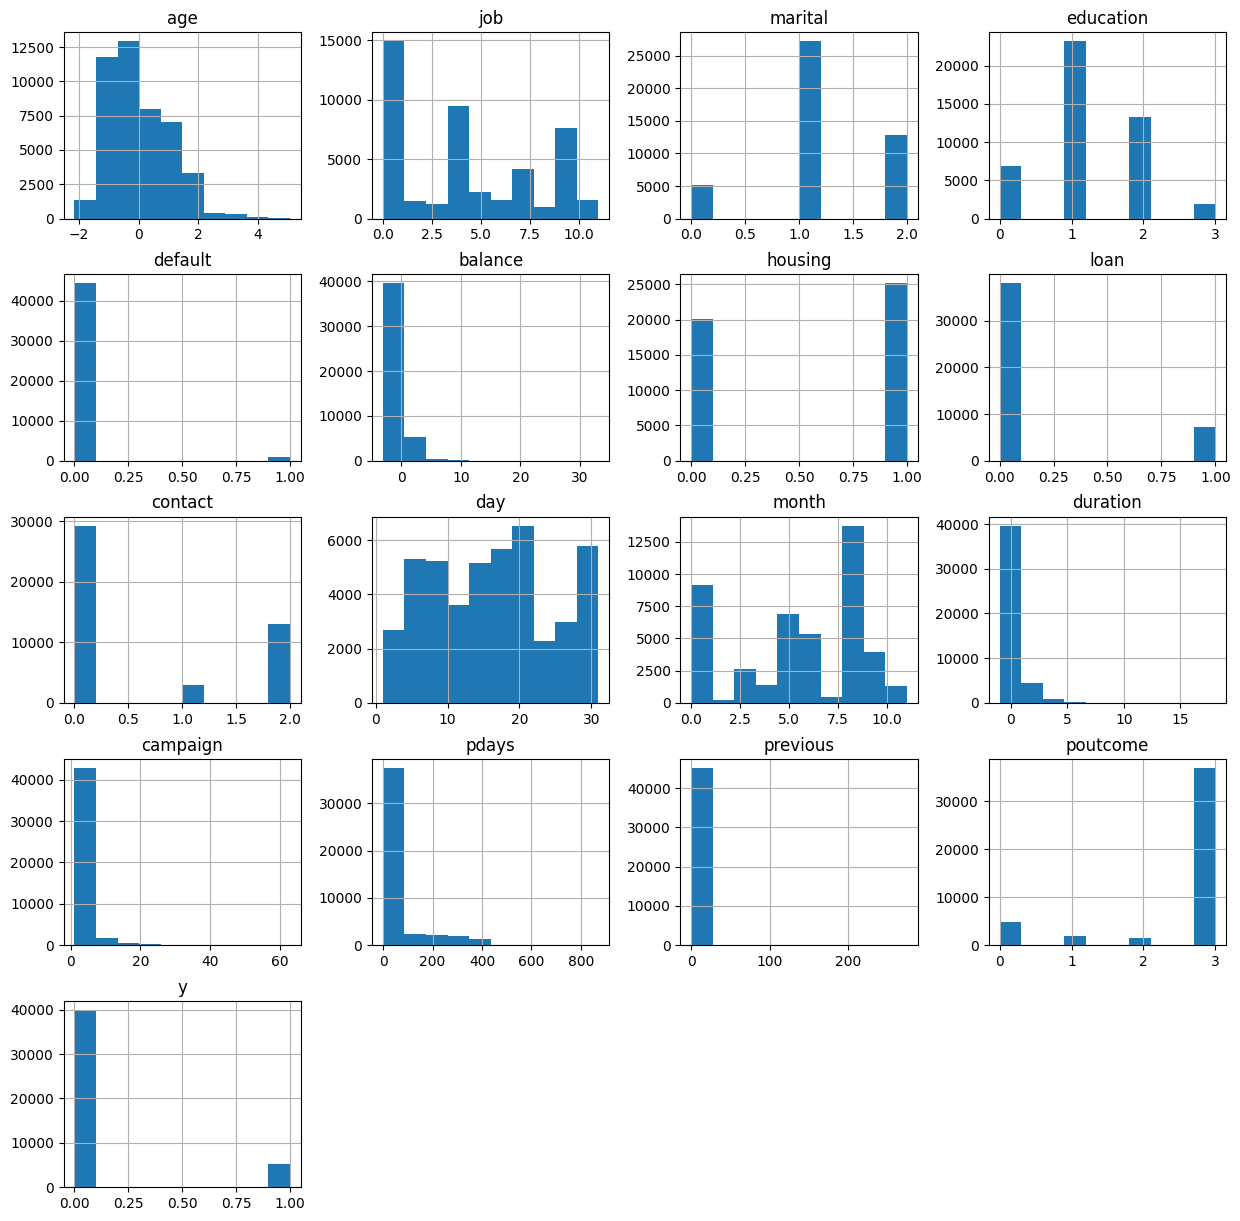

In [ ]:
# Plot histograms of numerical variables
df.hist(figsize=(15, 15))
plt.show()

In [ ]:
# Split the data into train and test sets
X = df.drop('y', axis=1) # features
y = df['y'] # target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # 80% train and 20% test

In [ ]:
X.shape, X_train.shape, X_test.shape

((45211, 16), (36168, 16), (9043, 16))

In [ ]:
y.shape, y_train.shape, y_test.shape

((45211,), (36168,), (9043,))

In [377]:
class GridSearch:
    def __init__(self, param_grid, model):
        self.param_grid = param_grid
        self.model = model
    
    def fit_model(self,alpha):
        model = self.model(ccp_alpha=alpha)
        model.fit(self.X_train, self.y_train)
        y_pred_train = model.predict(self.X_train)
        accuracy_train = accuracy_score(self.y_train, y_pred_train)
        return alpha, model, accuracy_train
    
    # fits train data 
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        best_alpha = 0
        best_accuracy = 0 
        self.models = []
        alphas = []
        train_accuracies = []
        for alpha in self.param_grid['ccp_alpha']:
          alpha, model, accuracy_train = self.fit_model(alpha) 
          if (accuracy_train > best_accuracy):
            best_alpha,  best_accuracy = alpha, accuracy_train
          alphas.append(alpha)
          train_accuracies.append(accuracy_train)
          self.models.append([alpha,model])

        
        self.best_params = {'ccp_alpha': best_alpha}
        self.results = pd.DataFrame({
            'alpha': alphas,
            'Train Accuracy': train_accuracies
        })

    # predict function to test accuracy on test data
    def predict(self, X_test, y_test):
        def test_model(model):
            alpha, clf = model[0], model[1]
            y_pred_test = clf.predict(X_test)
            accuracy_test = accuracy_score(y_test, y_pred_test)
            return alpha, accuracy_test

        test_results = [test_model(m) for m in self.models]
        self.results['Test Accuracy'] = [r[1] for r in test_results]

In [ ]:
C = [0.0002, 0.0004, 0.0006, 0.0008, 0.001, 0.0012, 0.0014, 0.0016, 0.0018, 0.002]

In [ ]:
def get_ccp_alphas(model, x_train, y_train):
    path = model.cost_complexity_pruning_path(x_train, y_train)
    return path.ccp_alphas.tolist()

In [ ]:
def alpha_parameter_tuning(params, x_train, y_train):   
    model = DecisionTreeClassifier(**params)
    ccp_alphas = get_ccp_alphas(model, x_train, y_train)
    params["ccp_alpha"] = ccp_alphas
    return params

### ID3

In [ ]:
param = {"criterion": "entropy", "ccp_alpha": C,"splitter": "best", "random_state": 0}

gd_model = GridSearch(param, DecisionTreeClassifier)
gd_model.fit(X_train,y_train)
gd_model.predict(X_test,y_test)
print(gd_model.best_params)
print(gd_model.results)

{'ccp_alpha': 0.0002}
    alpha  Train Accuracy  Test Accuracy
0  0.0002        0.907708       0.898485
1  0.0004        0.903755       0.899480
2  0.0006        0.903755       0.899480
3  0.0008        0.903755       0.899480
4  0.0010        0.902345       0.898264
5  0.0012        0.899663       0.895389
6  0.0014        0.899663       0.895389
7  0.0016        0.899663       0.895389
8  0.0018        0.899663       0.895389
9  0.0020        0.899663       0.895389


In [ ]:
params = {"criterion":"entropy", "splitter": "best", "random_state": 0}
params = alpha_parameter_tuning(params, X_train, y_train)

gd_model = GridSearch(params,DecisionTreeClassifier)
gd_model.fit(X_train,y_train)
gd_model.predict(X_test,y_test)
print(gd_model.best_params)
print(gd_model.results)

{'ccp_alpha': 0.0}
         alpha  Train Accuracy  Test Accuracy
0     0.000000        1.000000       0.868517
1     0.000038        0.977522       0.880792
2     0.000038        0.978185       0.880571
3     0.000044        0.969006       0.881124
4     0.000044        0.967540       0.881345
...        ...             ...            ...
1325  0.006420        0.883156       0.882451
1326  0.011821        0.883156       0.882451
1327  0.022570        0.883156       0.882451
1328  0.022794        0.883156       0.882451
1329  0.066458        0.883156       0.882451

[1330 rows x 3 columns]


In [337]:
pickle_data("Q4_id3.pkl",gd_model)

Slight decrease in training accuracy with increasing alphas, test accuracy remains similar but also decreases slightly


### C45

In [ ]:
param = {"criterion": "entropy", "ccp_alpha": C,"splitter": "random", "random_state": 0}

gd_model = GridSearch(param, DecisionTreeClassifier)
gd_model.fit(X_train,y_train)
gd_model.predict(X_test,y_test)
print(gd_model.best_params)
print(gd_model.results)

{'ccp_alpha': 0.0002}
    alpha  Train Accuracy  Test Accuracy
0  0.0002        0.907708       0.898485
1  0.0004        0.903755       0.899480
2  0.0006        0.903755       0.899480
3  0.0008        0.903755       0.899480
4  0.0010        0.902345       0.898264
5  0.0012        0.899663       0.895389
6  0.0014        0.899663       0.895389
7  0.0016        0.899663       0.895389
8  0.0018        0.899663       0.895389
9  0.0020        0.899663       0.895389


In [ ]:
params = {"criterion":"entropy", "splitter": "random", "random_state": 0}
params = alpha_parameter_tuning(params, X_train, y_train)

gd_model = GridSearch(params,DecisionTreeClassifier)
gd_model.fit(X_train,y_train)
gd_model.predict(X_test,y_test)
print(gd_model.best_params)
print(gd_model.results)

{'ccp_alpha': 0.0}
         alpha  Train Accuracy  Test Accuracy
0     0.000000        1.000000       0.865642
1     0.000025        0.995106       0.870065
2     0.000028        0.988443       0.875705
3     0.000029        0.987835       0.877695
4     0.000030        0.988056       0.876479
...        ...             ...            ...
1542  0.004443        0.889405       0.887095
1543  0.005120        0.883156       0.882451
1544  0.006339        0.883156       0.882451
1545  0.015453        0.883156       0.882451
1546  0.020437        0.883156       0.882451

[1547 rows x 3 columns]


In [338]:
pickle_data("Q4_c45.pkl",gd_model)

Slight decrease in training accuracy with increasing alphas, test accuracy remains similar but also decreases slightly


### C50

In [ ]:
param = {"criterion": "entropy", "ccp_alpha": C,"splitter": "random", "min_samples_leaf":30, 'max_leaf_nodes':30, "random_state": 0}

gd_model = GridSearch(param, DecisionTreeClassifier)
gd_model.fit(X_train,y_train)
gd_model.predict(X_test,y_test)
print(gd_model.best_params)
print(gd_model.results)

{'ccp_alpha': 0.0002}
    alpha  Train Accuracy  Test Accuracy
0  0.0002        0.907708       0.898485
1  0.0004        0.903755       0.899480
2  0.0006        0.903755       0.899480
3  0.0008        0.903755       0.899480
4  0.0010        0.902345       0.898264
5  0.0012        0.899663       0.895389
6  0.0014        0.899663       0.895389
7  0.0016        0.899663       0.895389
8  0.0018        0.899663       0.895389
9  0.0020        0.899663       0.895389


In [ ]:
param = {"criterion": "entropy","splitter": "random", "min_samples_leaf":30, 'max_leaf_nodes':30, "random_state": 0}
params = alpha_parameter_tuning(params, X_train, y_train)

gd_model = GridSearch(params,DecisionTreeClassifier)
gd_model.fit(X_train,y_train)
gd_model.predict(X_test,y_test)
print(gd_model.best_params)
print(gd_model.results)

{'ccp_alpha': 0.0}
         alpha  Train Accuracy  Test Accuracy
0     0.000000        1.000000       0.870397
1     0.000025        0.995300       0.870618
2     0.000028        0.988498       0.874931
3     0.000029        0.987945       0.877032
4     0.000030        0.987917       0.874378
...        ...             ...            ...
1542  0.004443        0.889405       0.887095
1543  0.005120        0.883156       0.882451
1544  0.006339        0.883156       0.882451
1545  0.015453        0.883156       0.882451
1546  0.020437        0.883156       0.882451

[1547 rows x 3 columns]


In [339]:
pickle_data("Q4_c50.pkl",gd_model)

Slight decrease in training accuracy with increasing alphas, test accuracy remains similar but also decreases slightly


### CART

In [ ]:
param = {"criterion": "gini", "ccp_alpha": C, "random_state": 0}

gd_model = GridSearch(param, DecisionTreeClassifier)
gd_model.fit(X_train,y_train)
gd_model.predict(X_test,y_test)
print(gd_model.best_params)
print(gd_model.results)

{'ccp_alpha': 0.0002}
    alpha  Train Accuracy  Test Accuracy
0  0.0002        0.907708       0.898485
1  0.0004        0.903755       0.899480
2  0.0006        0.903755       0.899480
3  0.0008        0.903755       0.899480
4  0.0010        0.902345       0.898264
5  0.0012        0.899663       0.895389
6  0.0014        0.899663       0.895389
7  0.0016        0.899663       0.895389
8  0.0018        0.899663       0.895389
9  0.0020        0.899663       0.895389


In [ ]:
param = {"criterion": "gini", "random_state": 0}
params = alpha_parameter_tuning(params, X_train, y_train)

gd_model = GridSearch(params,DecisionTreeClassifier)
gd_model.fit(X_train,y_train)
gd_model.predict(X_test,y_test)
print(gd_model.best_params)
print(gd_model.results)

{'ccp_alpha': 0.0}
         alpha  Train Accuracy  Test Accuracy
0     0.000000        1.000000       0.867411
1     0.000025        0.995023       0.871945
2     0.000028        0.988526       0.875594
3     0.000029        0.988222       0.875484
4     0.000030        0.987973       0.876479
...        ...             ...            ...
1542  0.004443        0.889405       0.887095
1543  0.005120        0.883156       0.882451
1544  0.006339        0.883156       0.882451
1545  0.015453        0.883156       0.882451
1546  0.020437        0.883156       0.882451

[1547 rows x 3 columns]


In [340]:
pickle_data("Q4_cart.pkl",gd_model)

Slight decrease in training accuracy with increasing alphas, test accuracy remains similar but also increase slightly


###Inference
The Cost Complexity Pruning Function's results indicate a trend: When we raise the alpha value, training accuracy declines but testing accuracy holds steady.

The variances in our findings are the consequence of the random removal of features from the tree dependent on the complexity parameter.